In [35]:
import time

import pandas as pd
import tensorflow as tf

import utils

# Dataset

In [36]:
case_1 = pd.read_csv("./datasets/case_1.csv", index_col='Time')
case_2 = pd.read_csv("./datasets/case_2.csv", index_col='Time')
case_3 = pd.read_csv("./datasets/case_3.csv", index_col='Time')
case_4 = pd.read_csv("./datasets/case_4.csv", index_col='Time')
case_5 = pd.read_csv("./datasets/case_5.csv", index_col='Time')

In [37]:
outlets = [ col for col in case_1.columns.values if col.startswith('outlet') ]
label_columns = outlets[1:]
num_features = case_1.shape[1]

In [38]:
column_indices = { name: i for i, name in enumerate(case_1.columns) }

In [39]:
PLOT_COL = "outlet_65"

# Model Creation

In [40]:
IN_WIDTH = 18
OUT_STEPS = 18
MAX_EPOCHS = 15
# MAX_EPOCHS = 100
BATCH_SIZE = 32
features_size = len(label_columns)

In [41]:
print(f"Using {IN_WIDTH*5}s of data to predict {OUT_STEPS*5}s.")
print(f"Using {IN_WIDTH*5//60}min {IN_WIDTH*5 % 60}s of data to predict {OUT_STEPS*5//60}min {IN_WIDTH*5 % 60}s into de future.")

Using 90s of data to predict 90s.
Using 1min 30s of data to predict 1min 30s into de future.


In [42]:
CONV_WIDTH = 3 # default 3
multi_conv_model = tf.keras.Sequential([
    # Shape [batch, time, features] => [batch, CONV_WIDTH, features]
    tf.keras.layers.Lambda(lambda x: x[:, -CONV_WIDTH:, :]),
    # Shape => [batch, 1, conv_units]
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv1D(256, activation='relu', kernel_size=(CONV_WIDTH)),
    # Shape => [batch, 1,  out_steps*features]
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(OUT_STEPS*features_size,
                          kernel_initializer=tf.initializers.zeros()),
    # Shape => [batch, out_steps, features]
    tf.keras.layers.Reshape([OUT_STEPS, features_size])
])

multi_conv_model.compile(loss=tf.losses.MeanSquaredError(),
                         optimizer=tf.optimizers.Adam(),
                         metrics=[tf.metrics.RootMeanSquaredError()])

# history = compile_and_fit(multi_conv_model, multi_window)

# IPython.display.clear_output()

# multi_val_performance['Conv'] = multi_conv_model.evaluate(multi_window.val)
# multi_performance['Conv'] = multi_conv_model.evaluate(multi_window.test, verbose=0)
# multi_window.plot(multi_conv_model)

In [43]:
exec_times = {}

In [44]:
results = {}

## Case 2

In [45]:
start_t = time.time()

window, history = utils.train_case(
    case_df=case_2,
    model=multi_conv_model,
    label_cols=label_columns,
    in_width=IN_WIDTH,
    out_steps=OUT_STEPS,
    max_epochs=MAX_EPOCHS,
    batch_size=BATCH_SIZE
)
exec_times['case_2'] = time.time() - start_t

2022-11-01 19:16:24.571769: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-11-01 19:16:25.070724: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


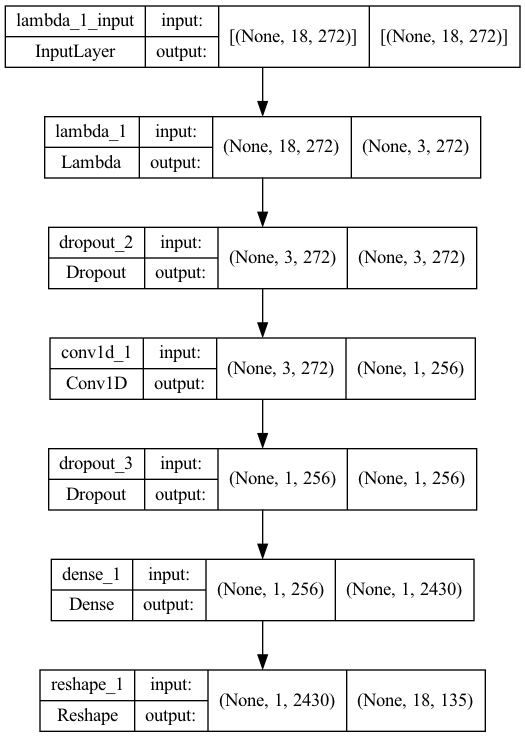

In [46]:
tf.keras.utils.plot_model(multi_conv_model, "./plots/models/multi_conv_model.png", show_shapes=True)

label_col_index 64
label_col_index 64
label_col_index 64


2022-11-01 19:16:31.310434: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


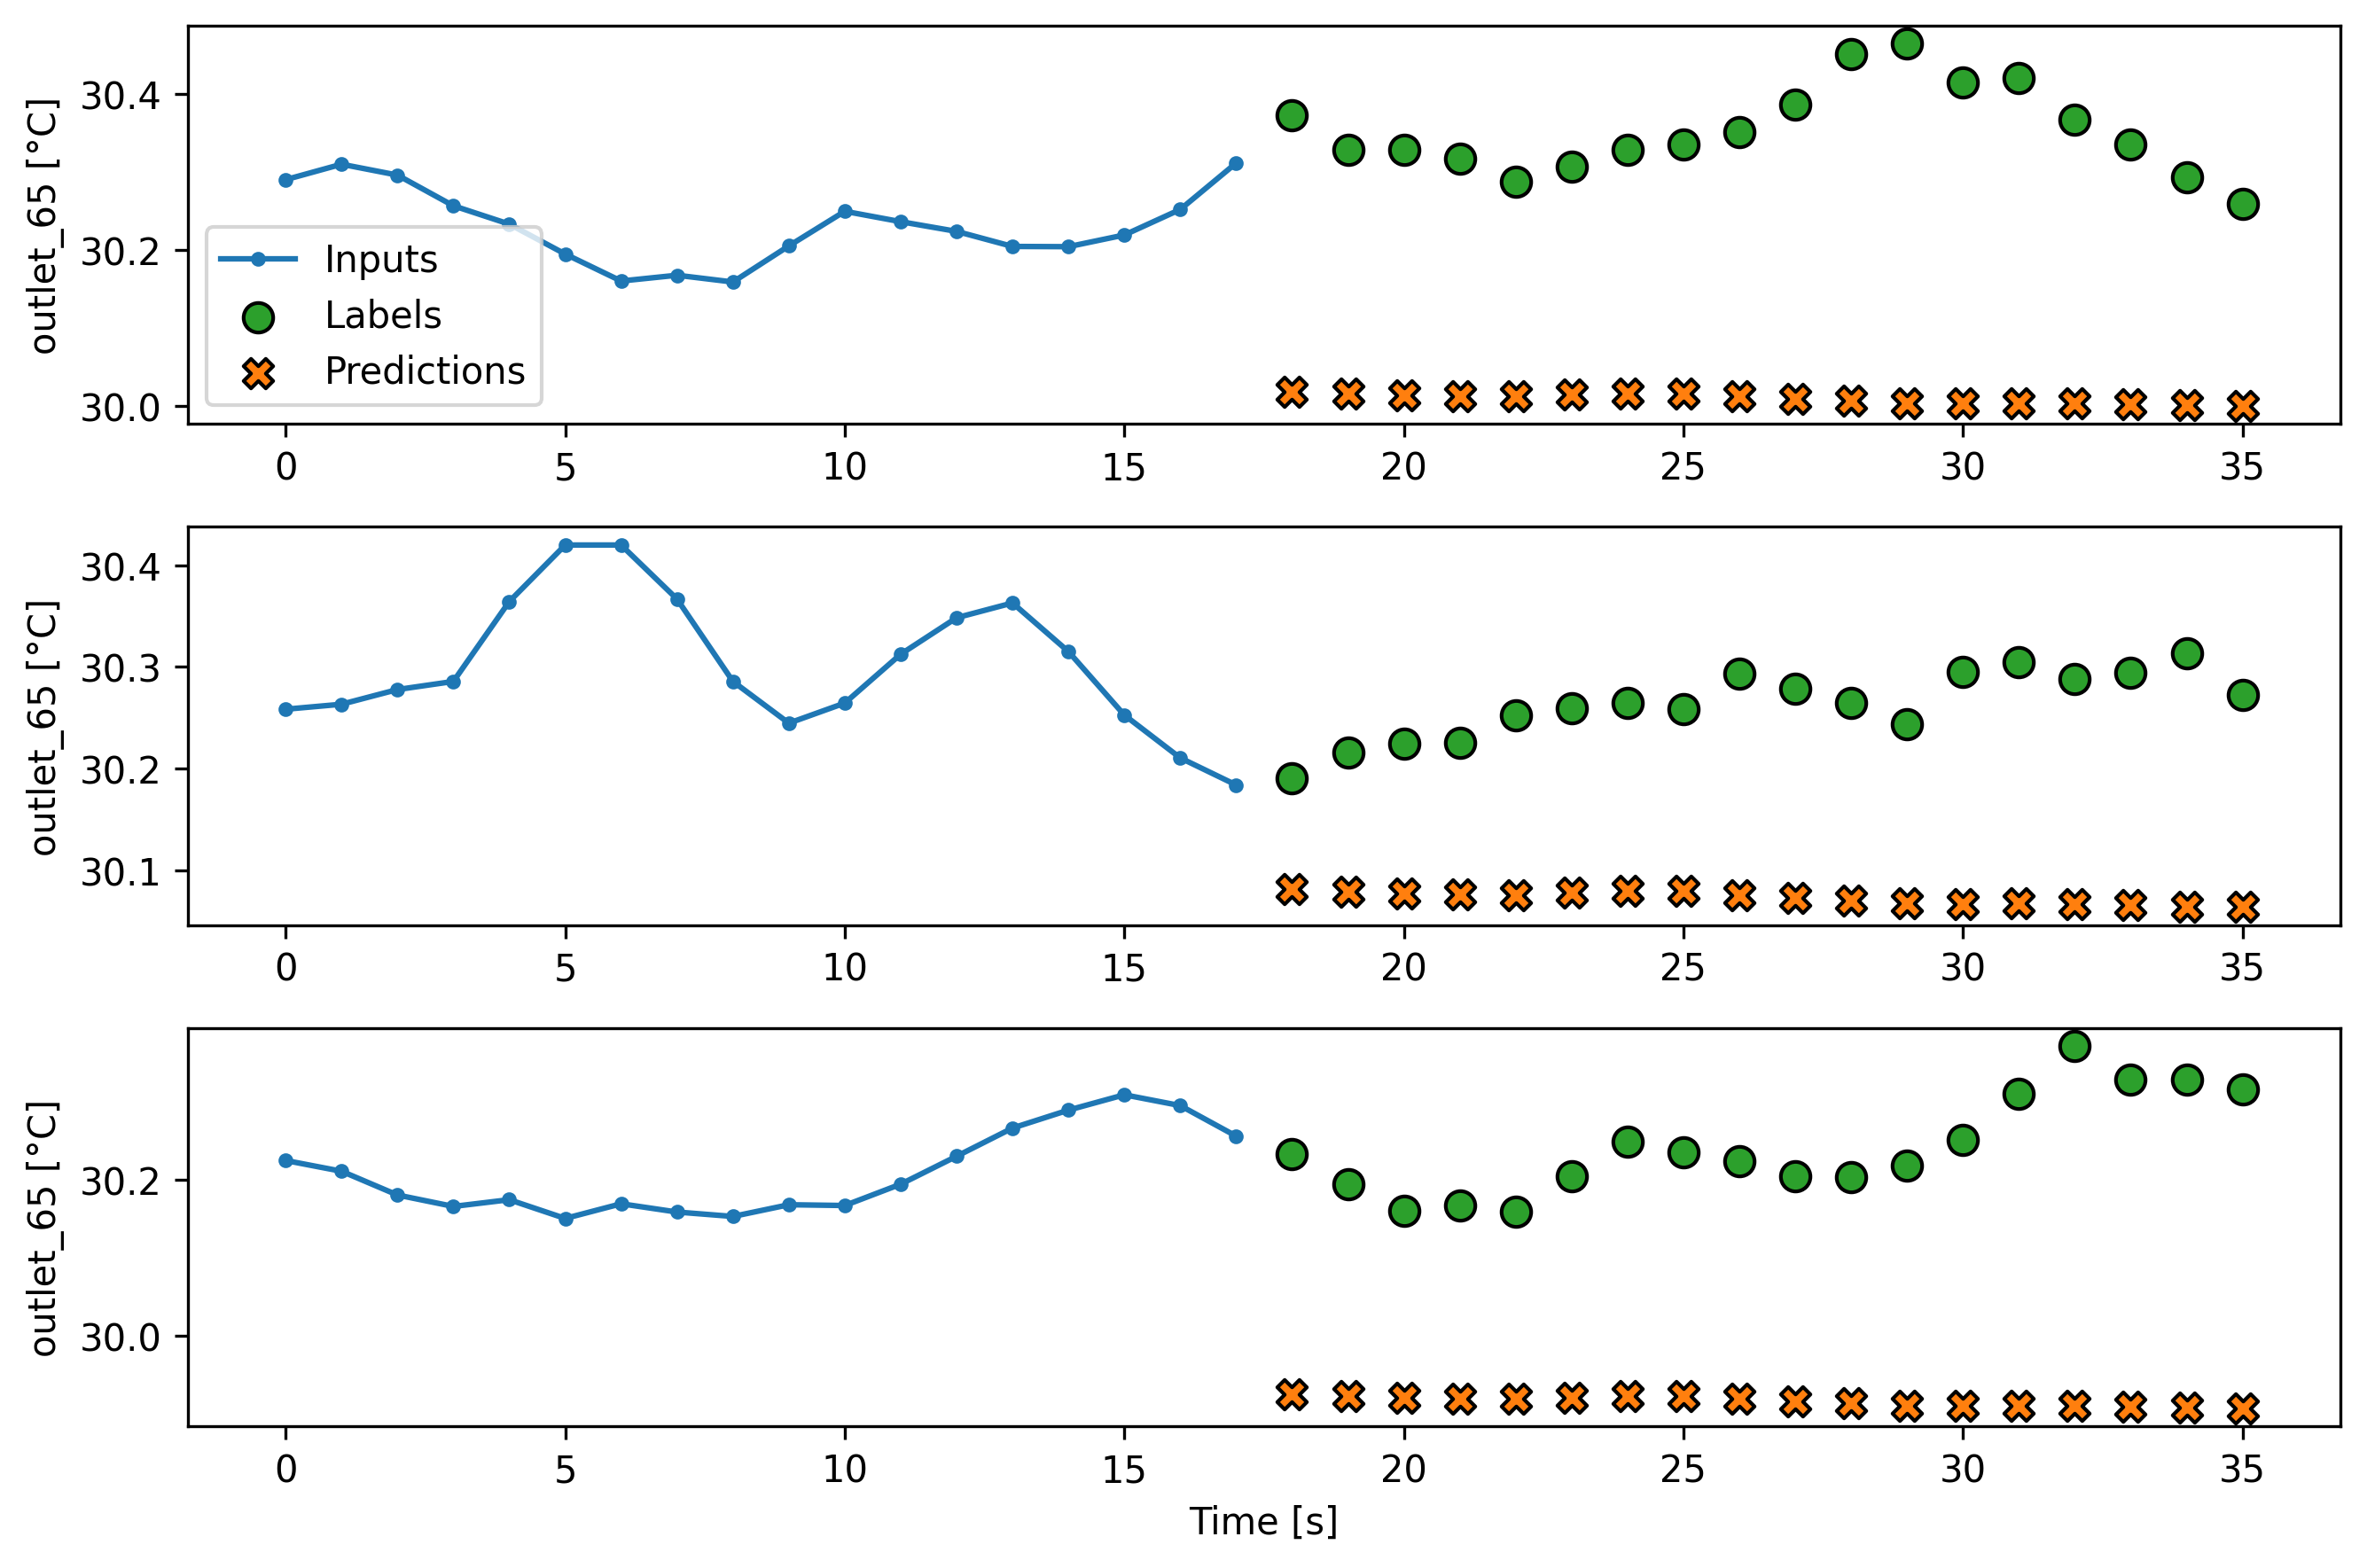

In [47]:
window.plot(multi_conv_model, plot_col=PLOT_COL)

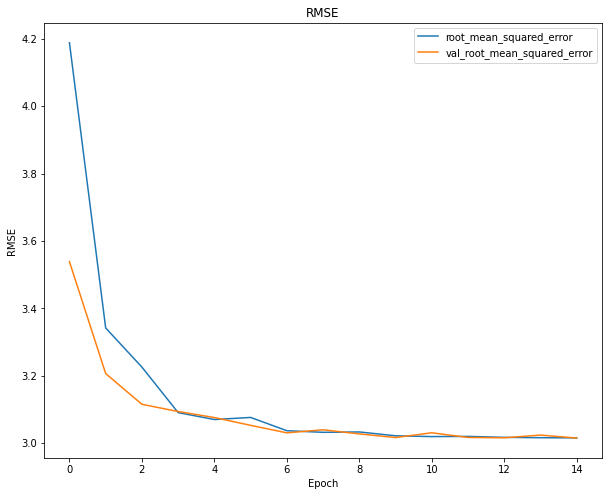

In [48]:
utils.plot_losses(history=history)

In [49]:
results['case_2'] = {
    'loss': history.history['loss'][-1],
    'rmse': history.history['root_mean_squared_error'][-1],
    'val_loss': history.history['val_loss'][-1],
    'val_rmse': history.history['val_root_mean_squared_error'][-1],
}

## Case 3

In [50]:
start_t = time.time()

window, history = utils.train_case(
    case_df=case_3,
    model=multi_conv_model,
    label_cols=label_columns,
    in_width=IN_WIDTH,
    out_steps=OUT_STEPS,
    max_epochs=MAX_EPOCHS,
    batch_size=BATCH_SIZE
)

exec_times['case_3'] = time.time() - start_t

label_col_index 64
label_col_index 64
label_col_index 64


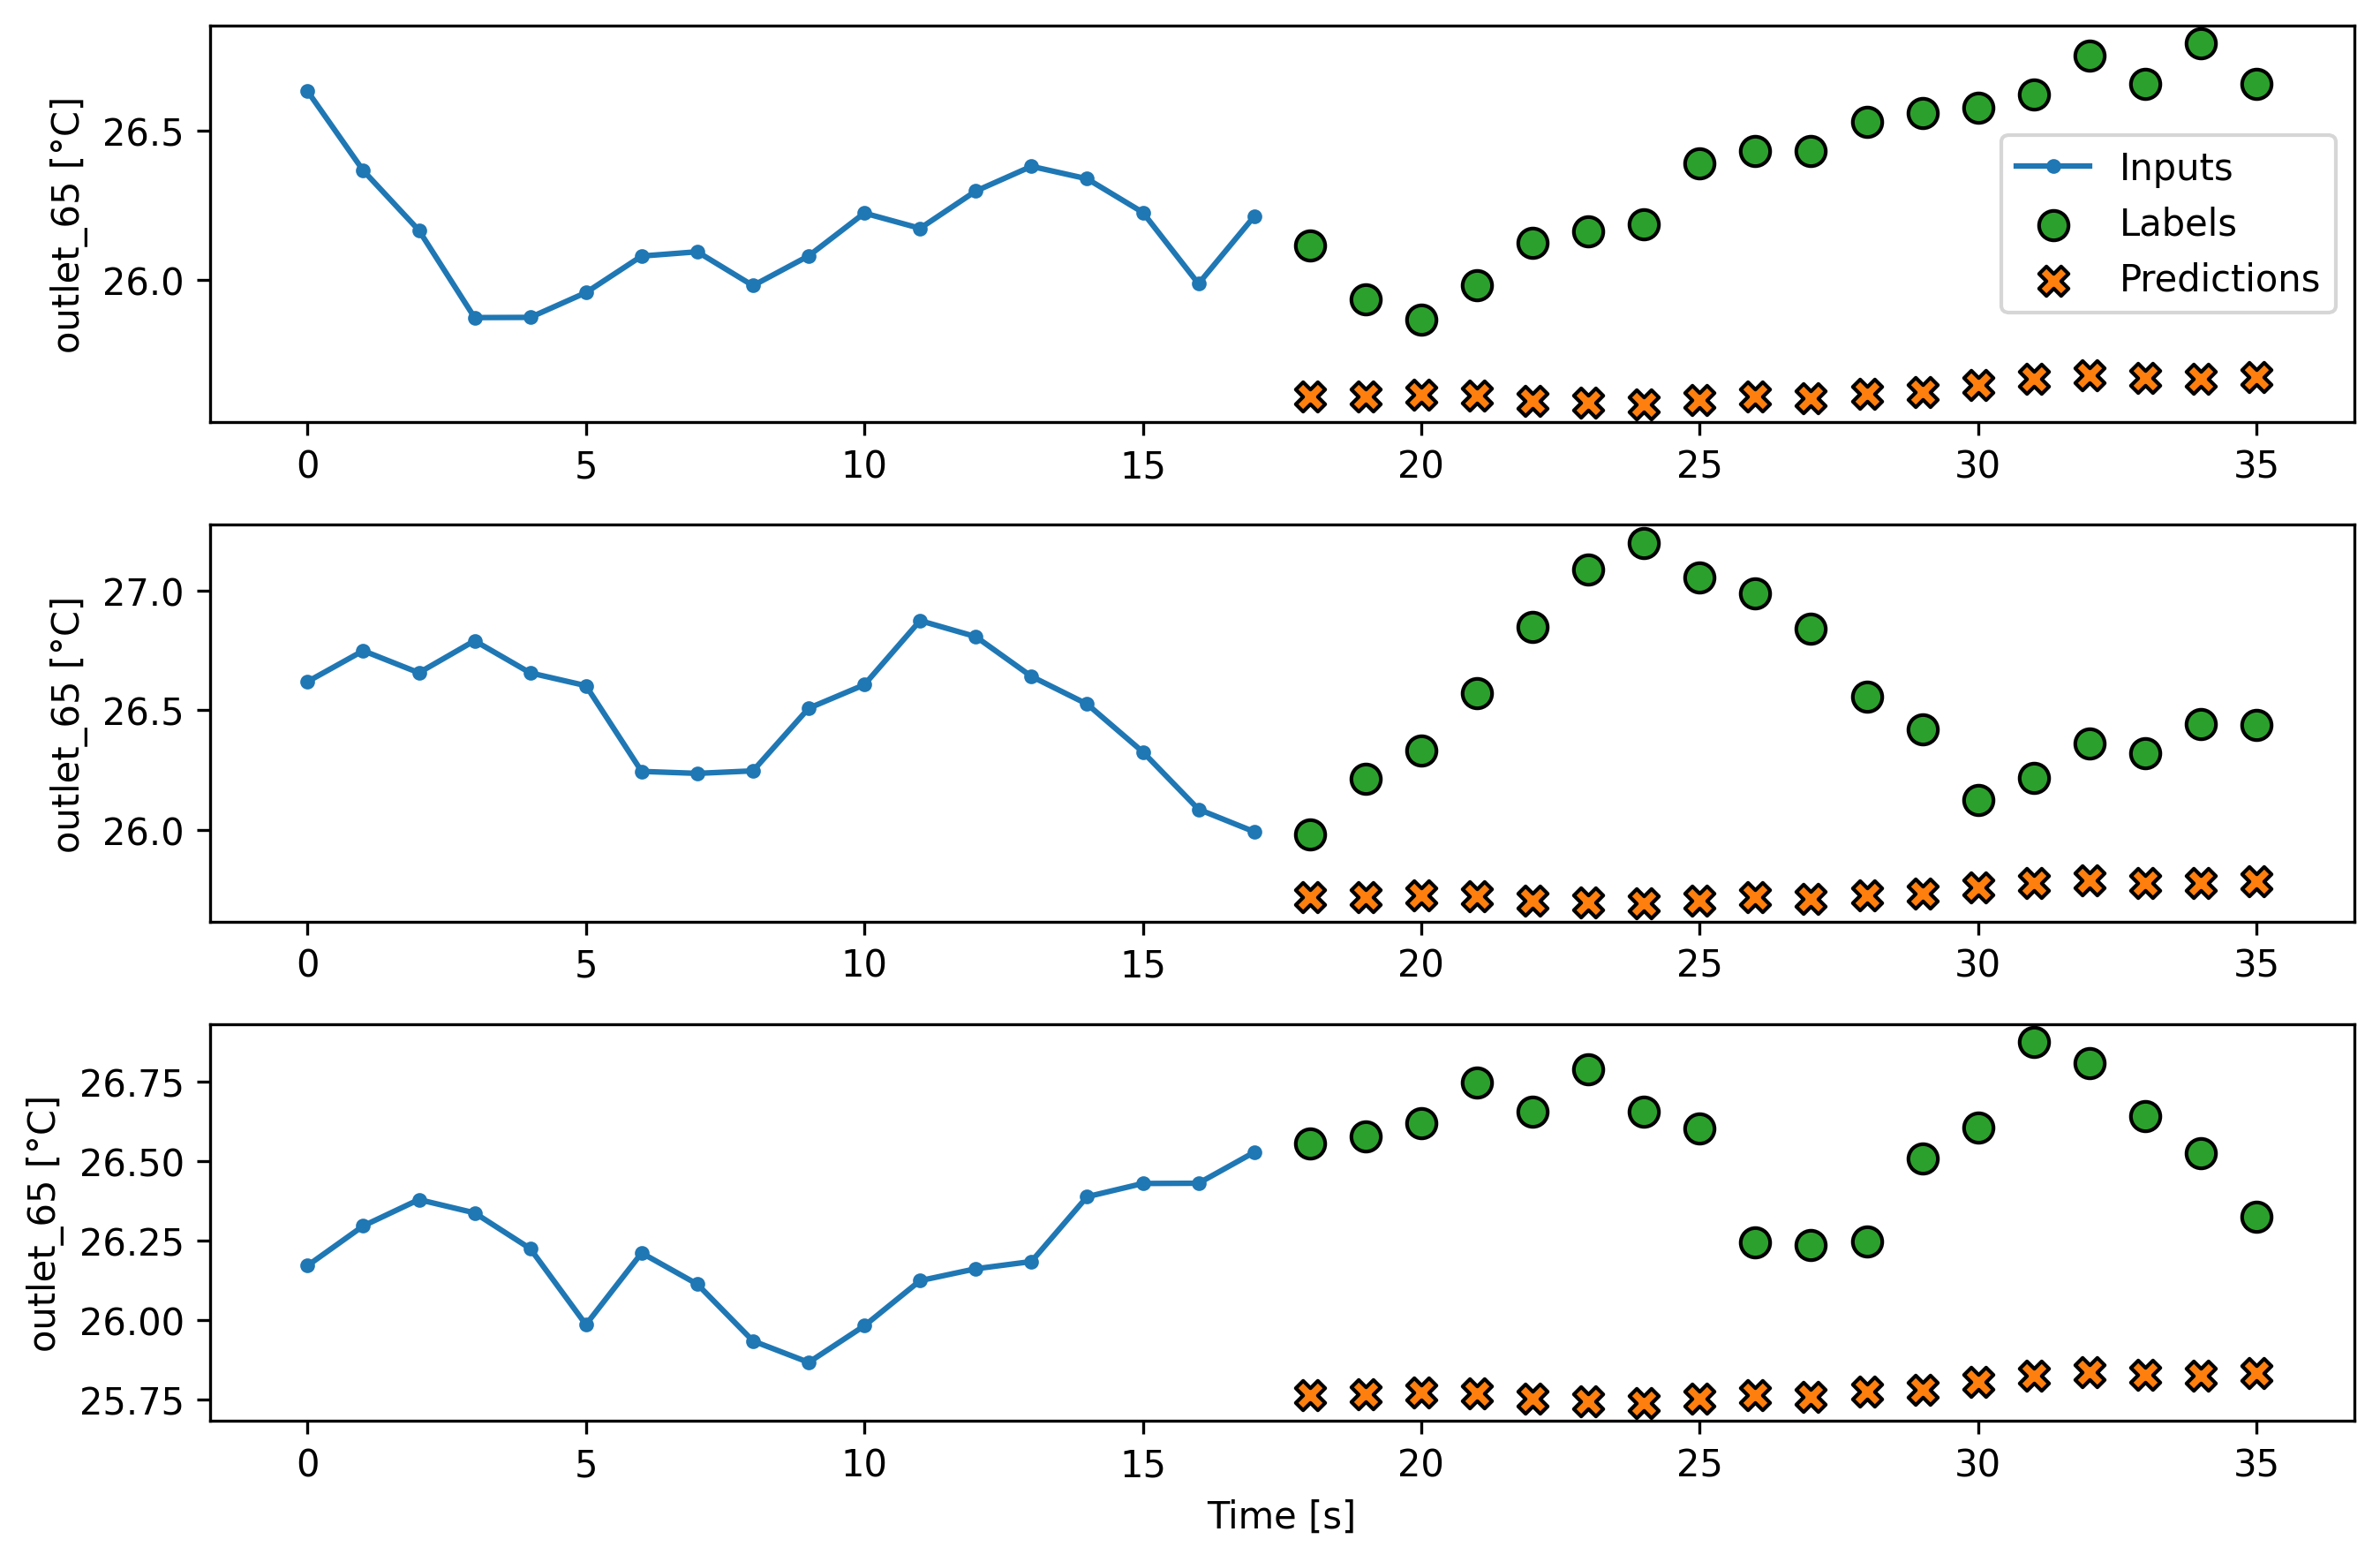

In [51]:
window.plot(multi_conv_model, plot_col=PLOT_COL)

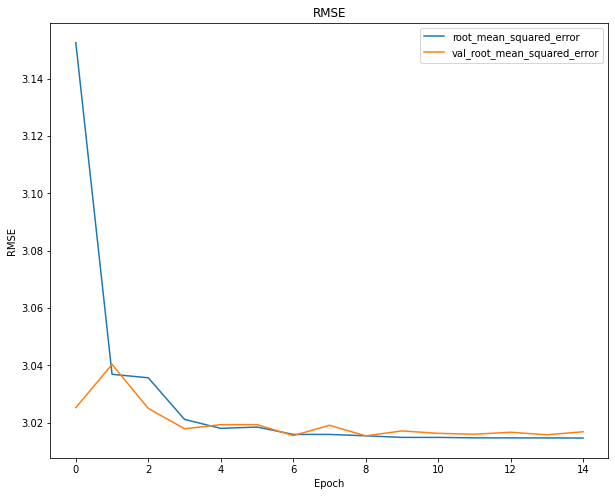

In [52]:
utils.plot_losses(history=history)

In [53]:
results['case_3'] = {
    'loss': history.history['loss'][-1],
    'rmse': history.history['root_mean_squared_error'][-1],
    'val_loss': history.history['val_loss'][-1],
    'val_rmse': history.history['val_root_mean_squared_error'][-1],
}

## Case 4

In [54]:
start_t = time.time()

window, history = utils.train_case(
    case_df=case_4,
    model=multi_conv_model,
    label_cols=label_columns,
    in_width=IN_WIDTH,
    out_steps=OUT_STEPS,
    max_epochs=MAX_EPOCHS,
    batch_size=BATCH_SIZE
)

exec_times['case_4'] = time.time() - start_t

label_col_index 64
label_col_index 64
label_col_index 64


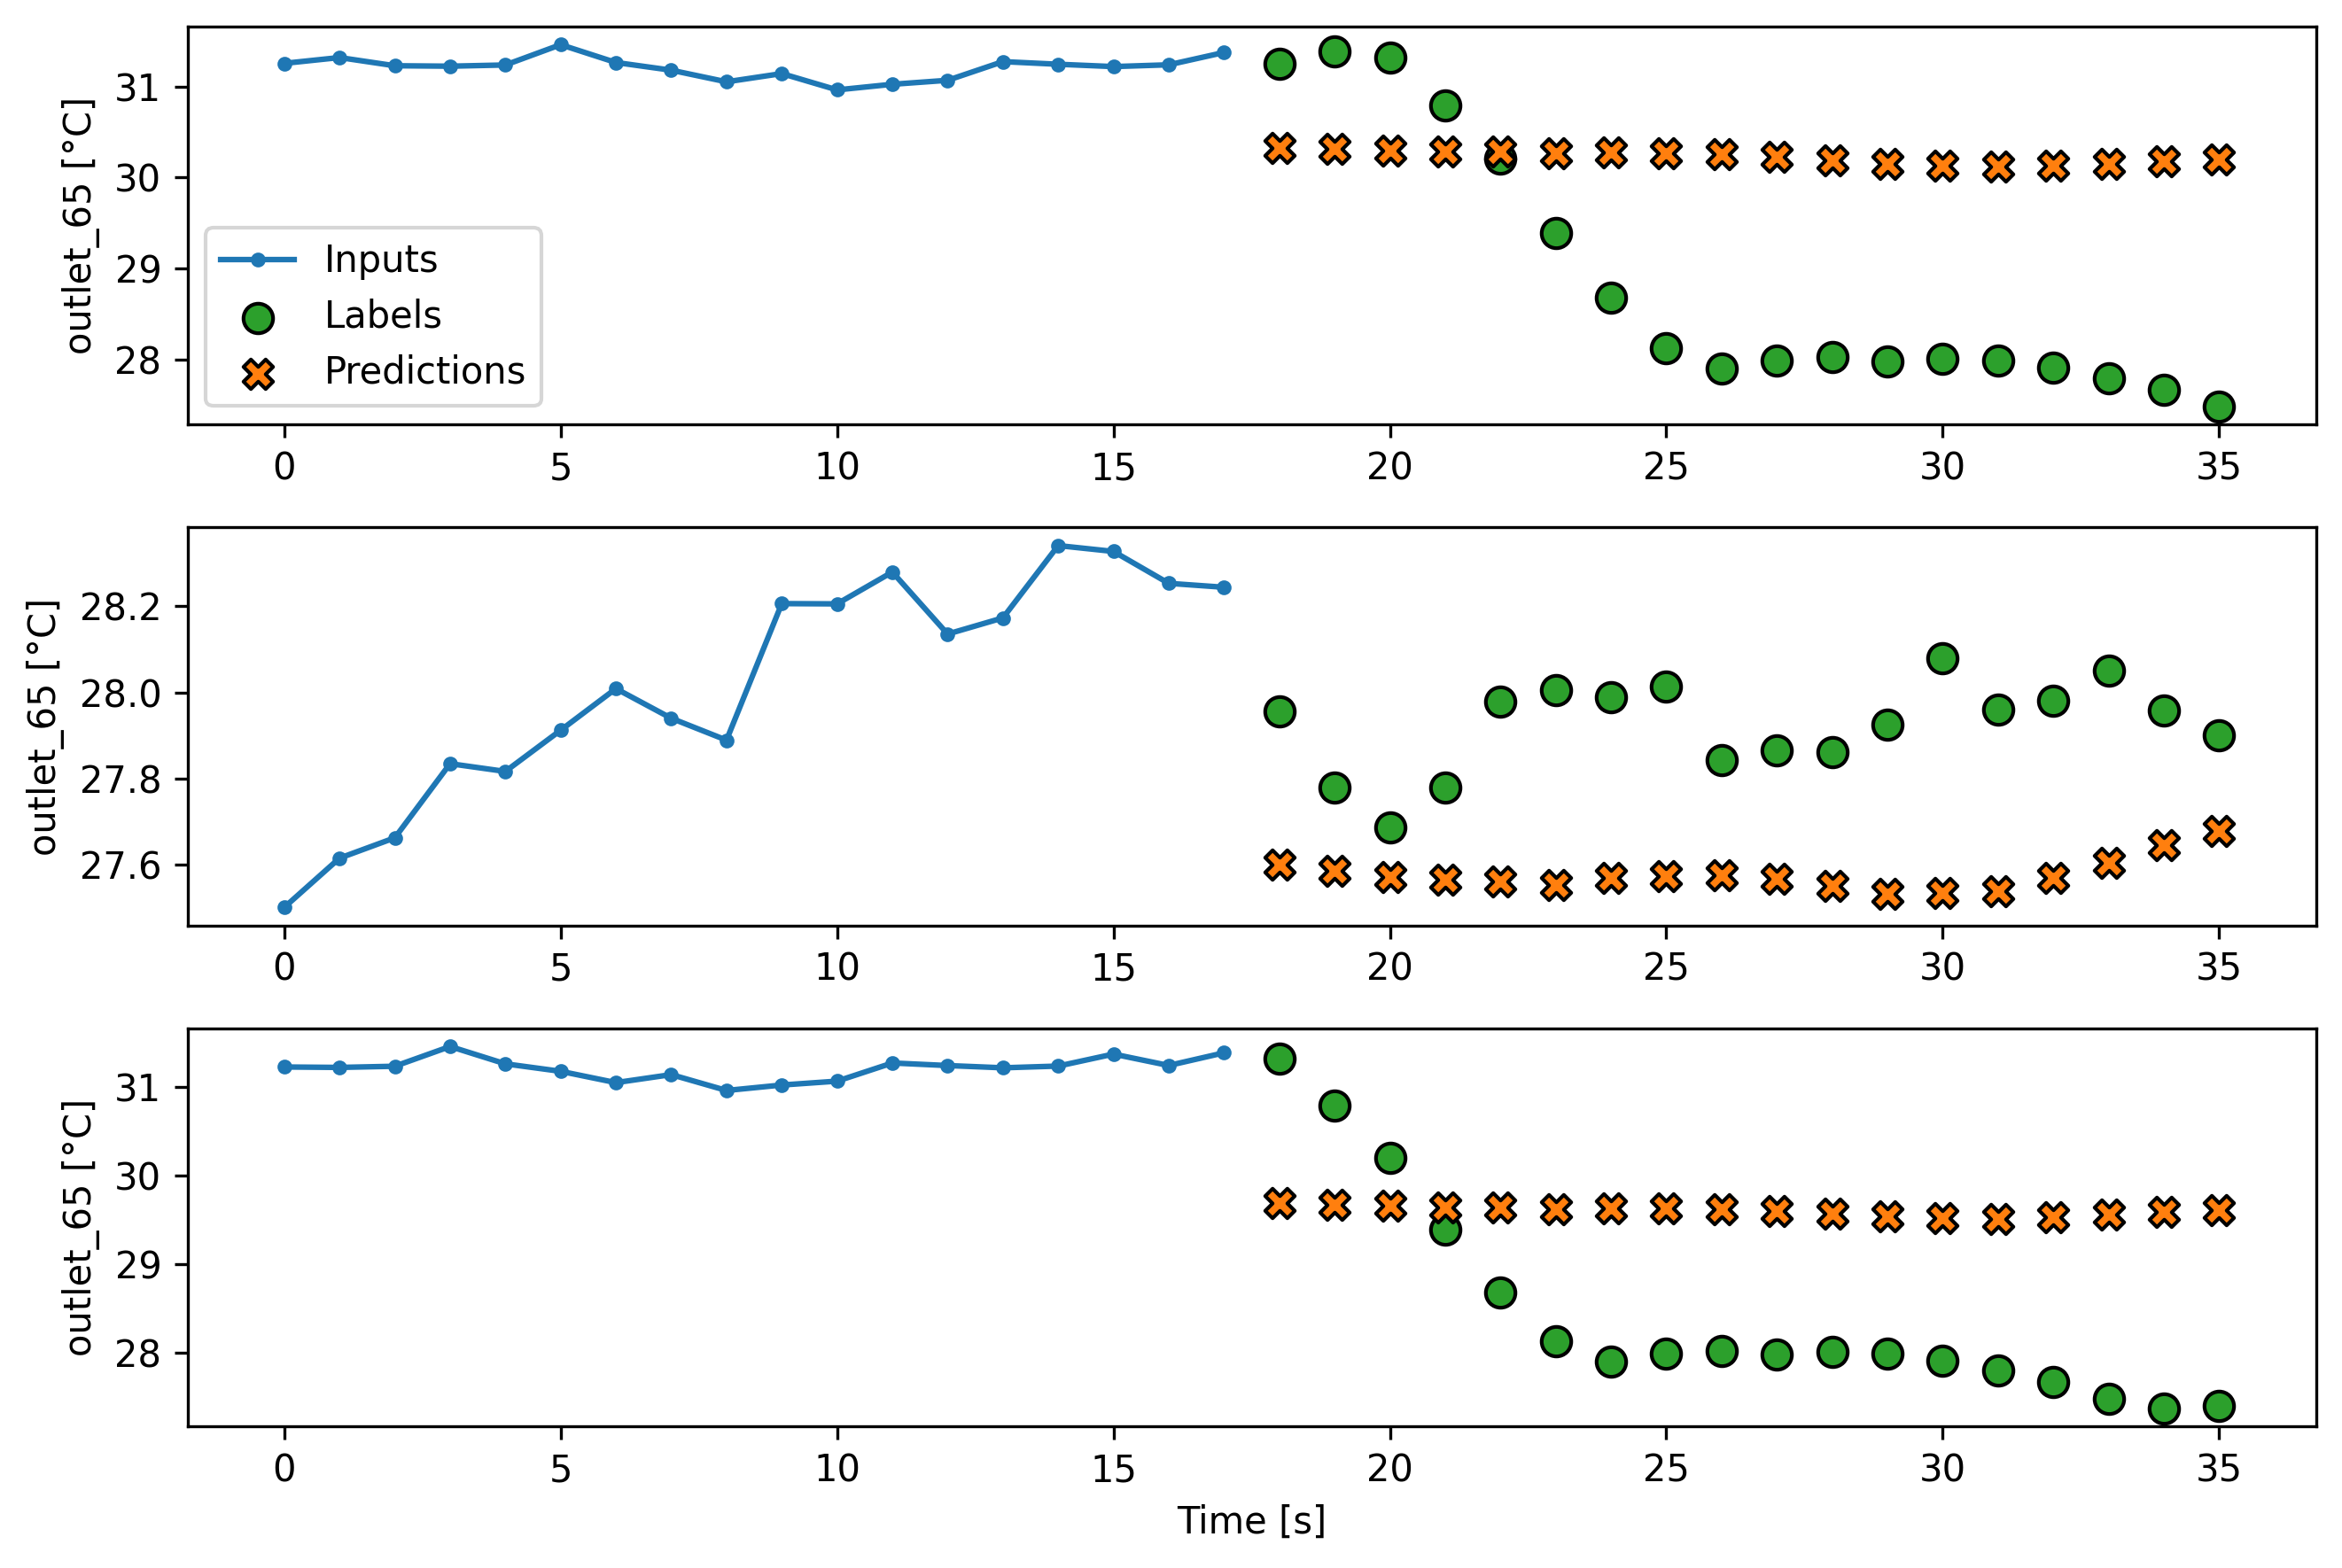

In [55]:
window.plot(multi_conv_model, plot_col=PLOT_COL)

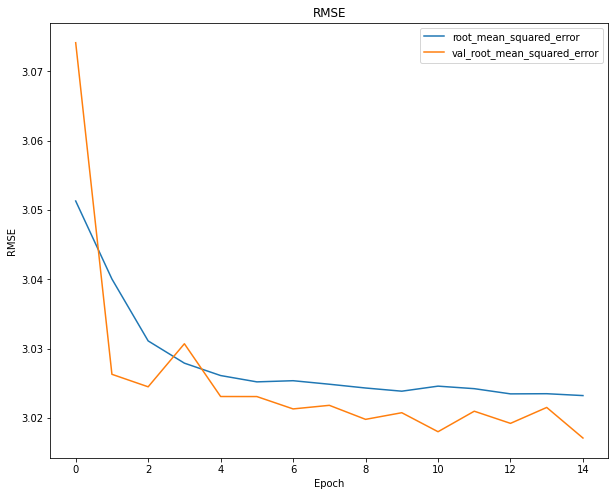

In [56]:
utils.plot_losses(history=history)

In [57]:
results['case_4'] = {
    'loss': history.history['loss'][-1],
    'rmse': history.history['root_mean_squared_error'][-1],
    'val_loss': history.history['val_loss'][-1],
    'val_rmse': history.history['val_root_mean_squared_error'][-1],
}

## Case 5

In [58]:
start_t = time.time()

window, history = utils.train_case(
    case_df=case_5,
    model=multi_conv_model,
    label_cols=label_columns,
    in_width=IN_WIDTH,
    out_steps=OUT_STEPS,
    max_epochs=MAX_EPOCHS,
    batch_size=BATCH_SIZE
)

exec_times['case_5'] = time.time() - start_t

label_col_index 64
label_col_index 64
label_col_index 64


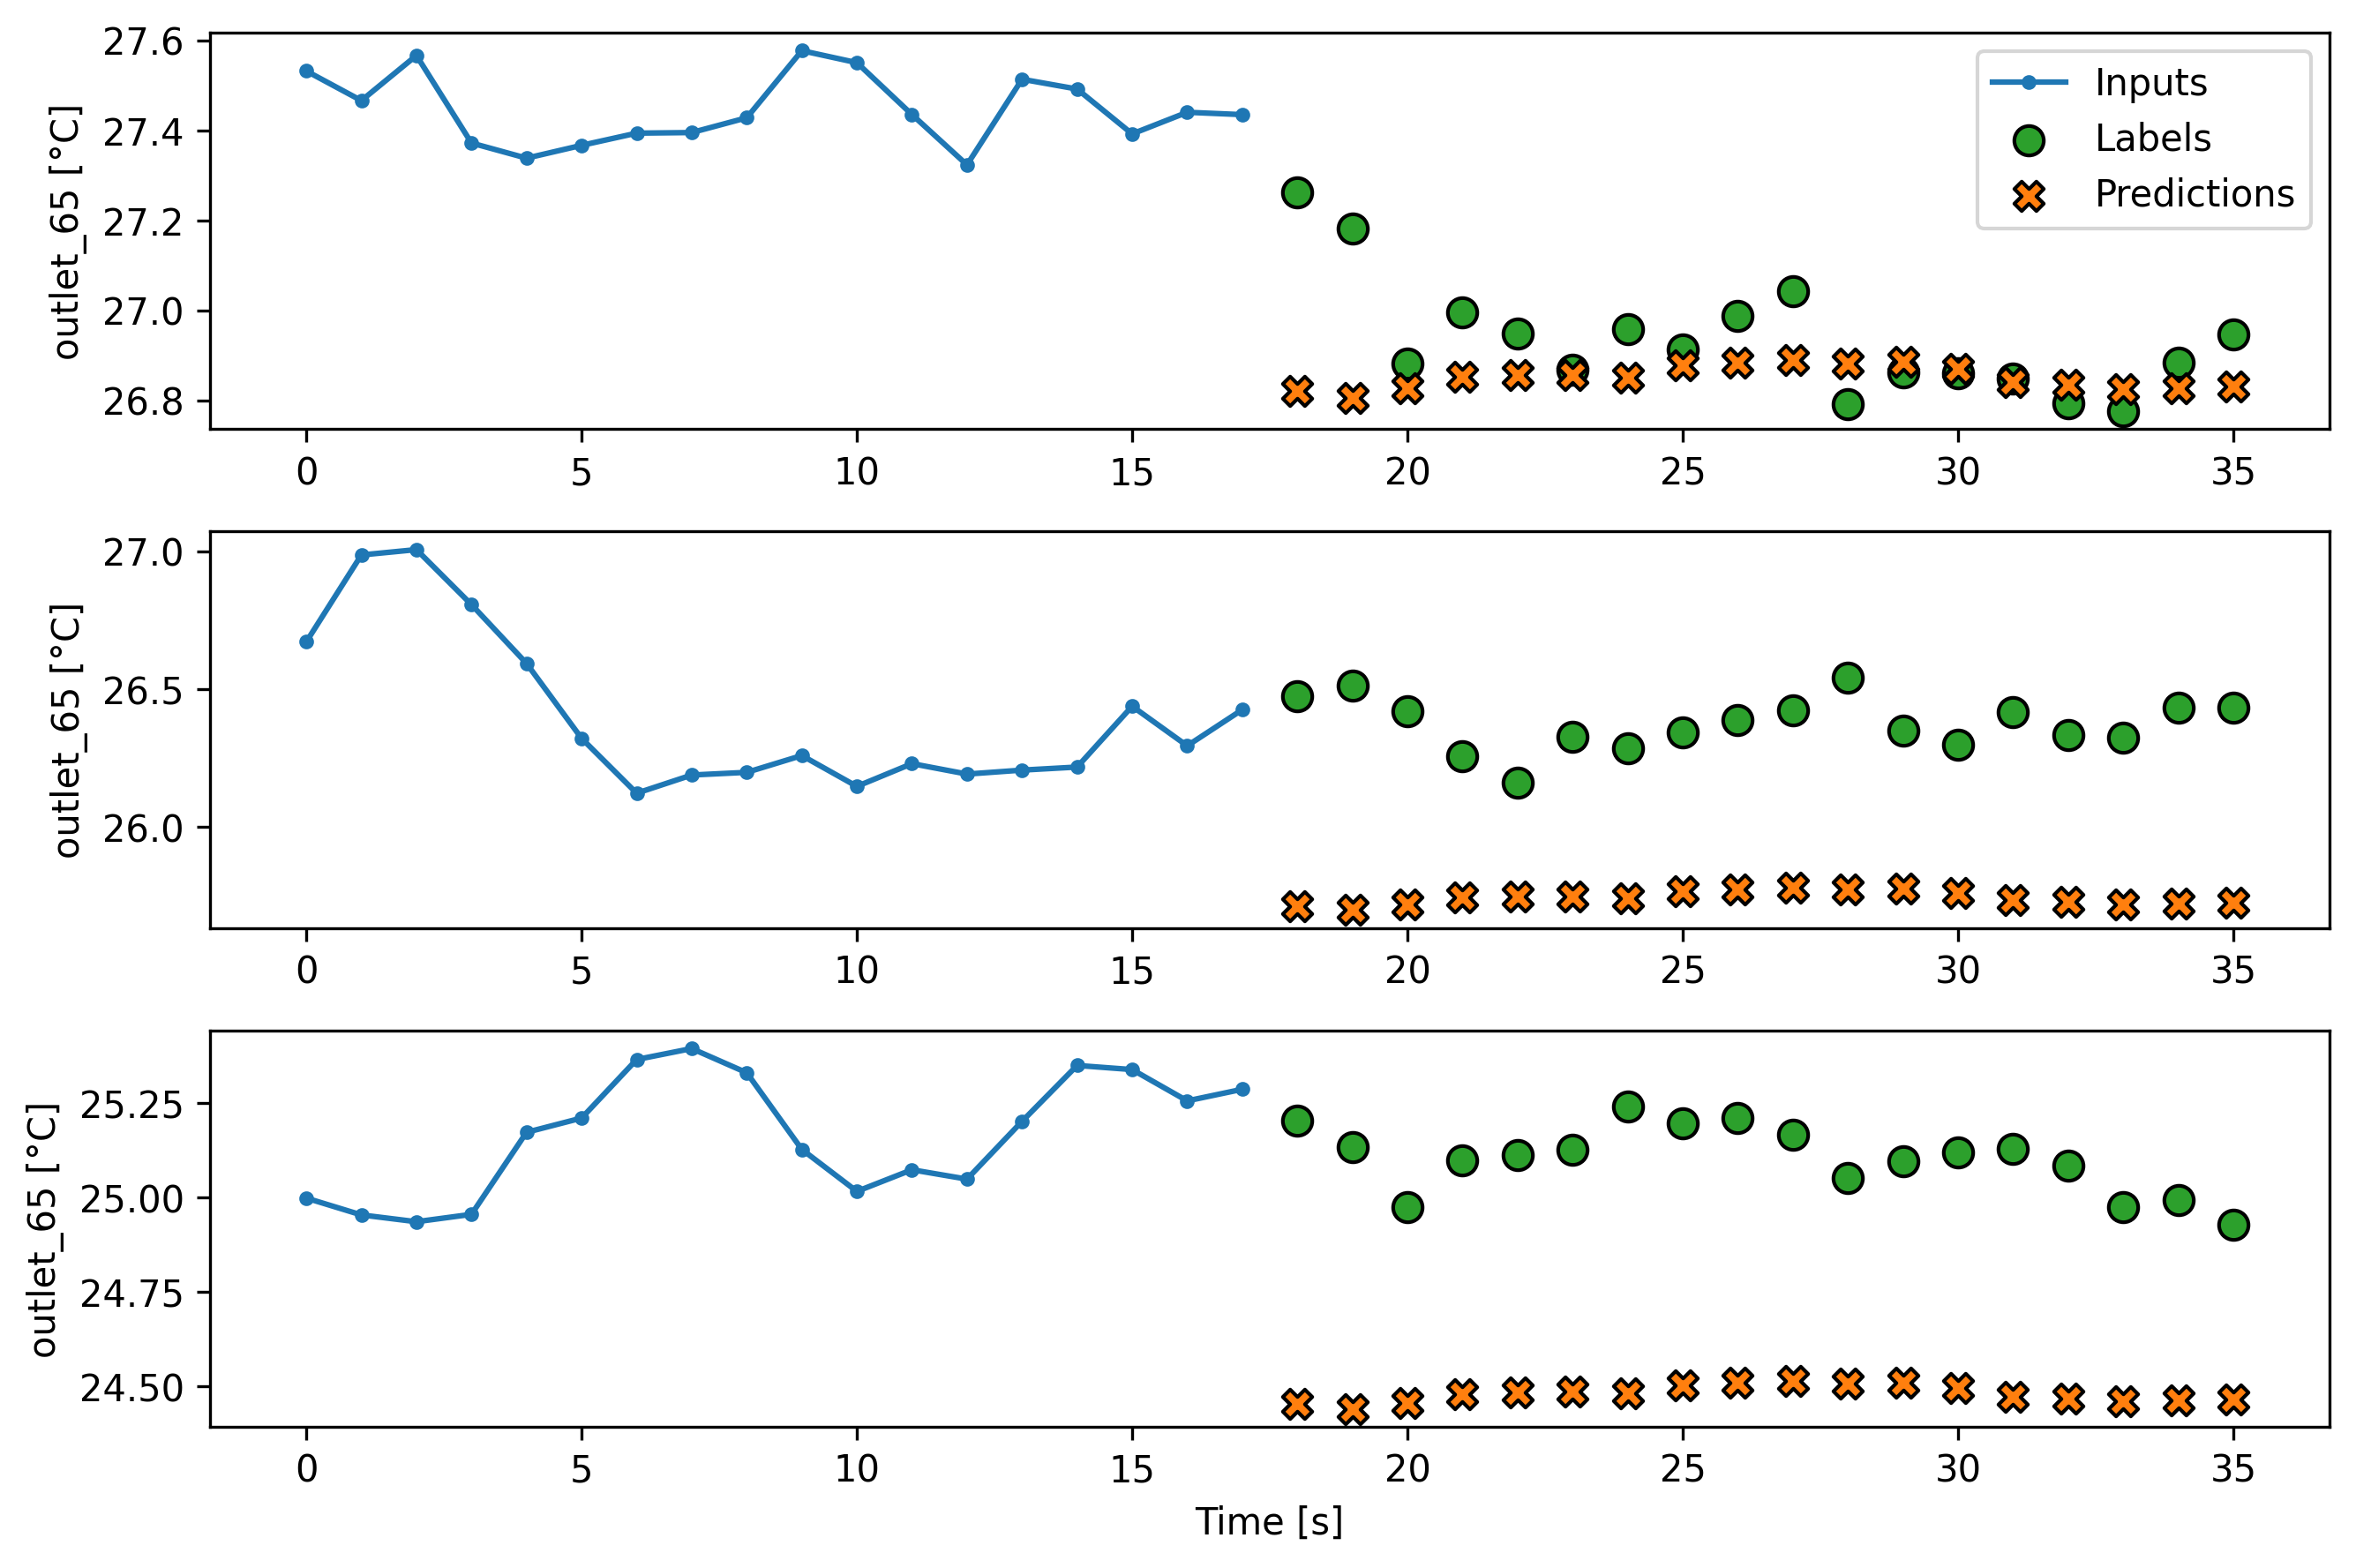

In [59]:
window.plot(multi_conv_model, plot_col=PLOT_COL)

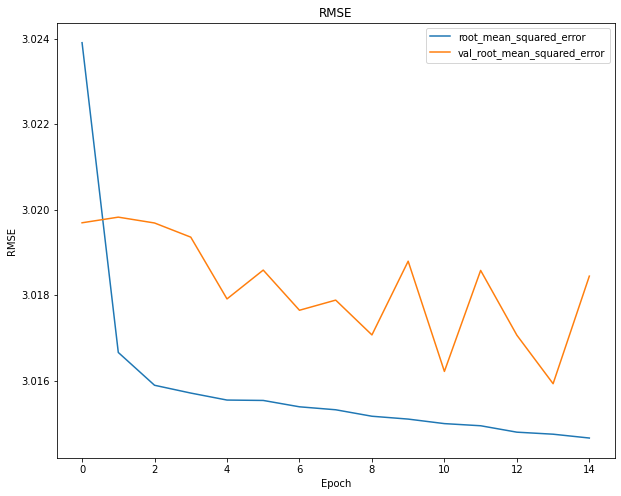

In [60]:
utils.plot_losses(history=history)

In [61]:
results['case_5'] = {
    'loss': history.history['loss'][-1],
    'rmse': history.history['root_mean_squared_error'][-1],
    'val_loss': history.history['val_loss'][-1],
    'val_rmse': history.history['val_root_mean_squared_error'][-1],
}

## Case 1 (Testing)

In [62]:
window = utils.WindowGenerator(
    train_df=case_1,
    input_width=IN_WIDTH,
    label_width=OUT_STEPS,
    shift=OUT_STEPS,
    label_columns=label_columns
)

test_res = multi_conv_model.evaluate(window.train) # testing

5/5 [==============================] - 0s 8ms/step - loss: 0.0181 - root_mean_squared_error: 0.1487


In [63]:
results['test'] = {
    'loss': utils.inverse_transform(test_res[0]),
    'rmse': utils.inverse_transform_rmse(test_res[1])
}

# Results

label_col_index 64
label_col_index 64
label_col_index 64


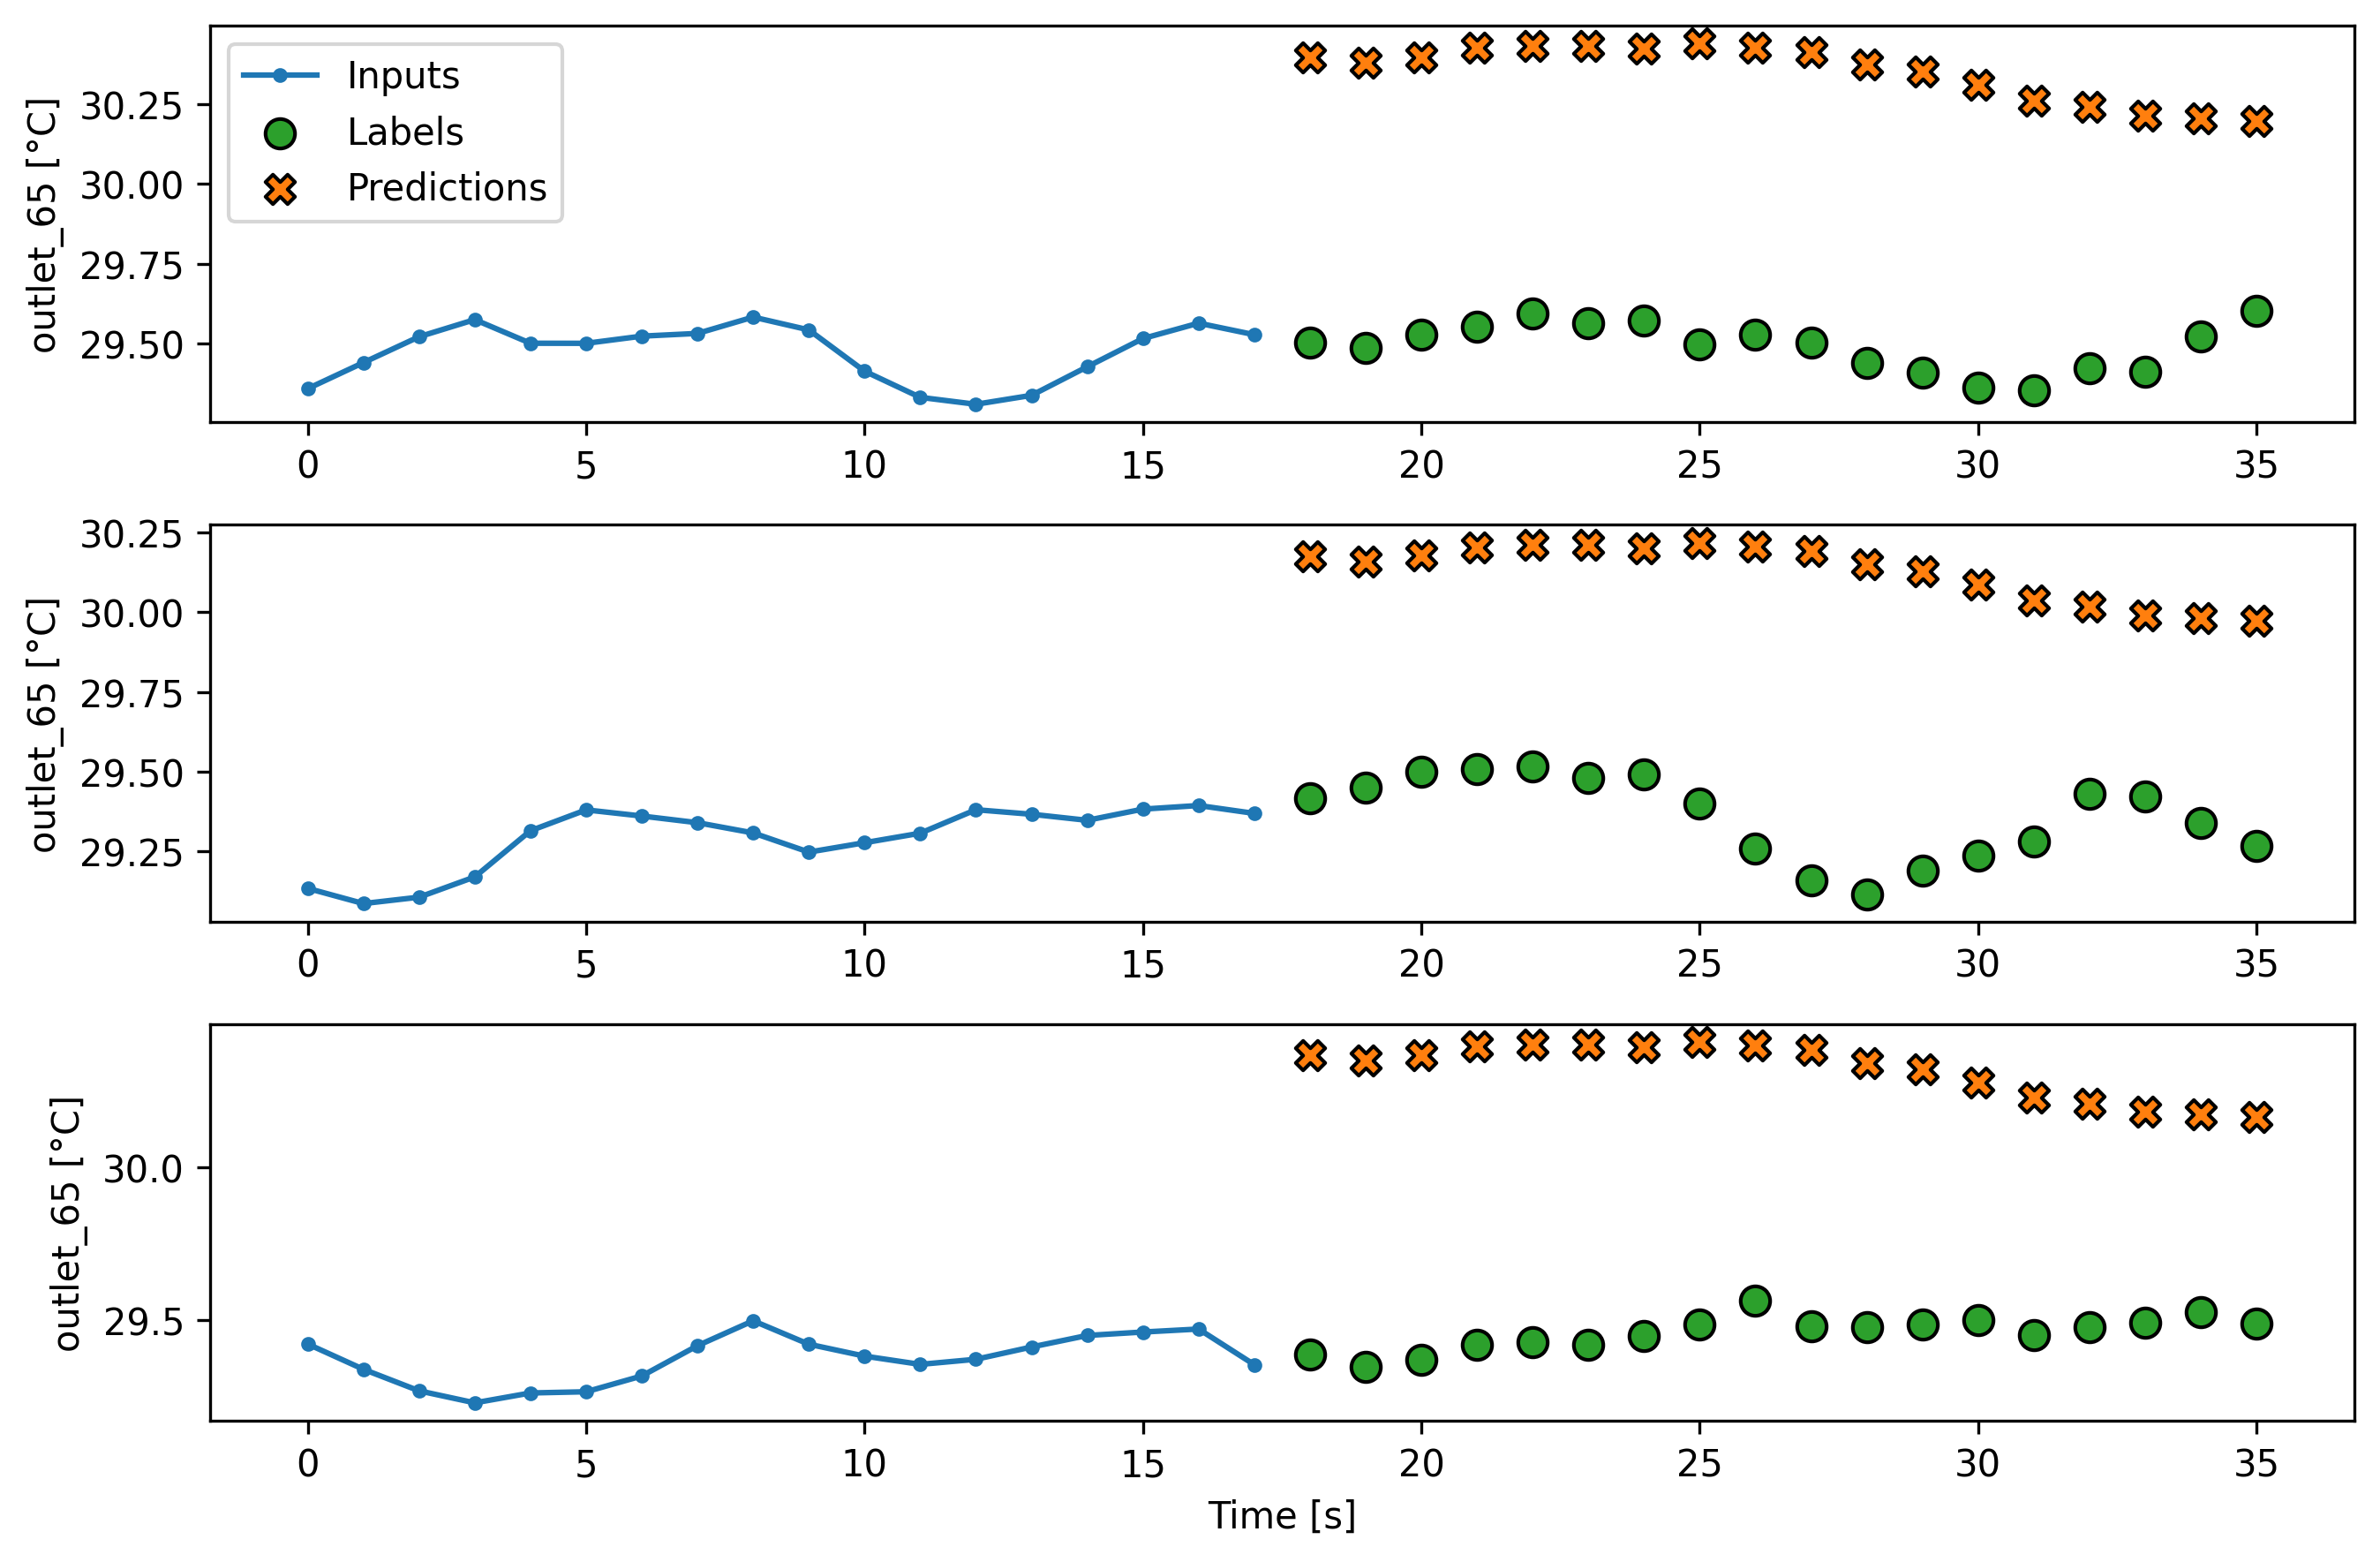

In [64]:
window.plot(
    multi_conv_model,
    plot_col=PLOT_COL,
    filename="./plots/predictions/multi_conv.jpg"
)

In [65]:
results_df = pd.DataFrame(results).transpose().round(2)
print(results_df.style.format(precision=2).to_latex())

results_df.to_pickle("./results/metrics/multi_conv.pkl")

\begin{tabular}{lrrrr}
 & loss & rmse & val_loss & val_rmse \\
case_2 & 9.09 & 3.02 & 9.09 & 3.01 \\
case_3 & 9.09 & 3.01 & 9.10 & 3.02 \\
case_4 & 9.13 & 3.02 & 9.10 & 3.02 \\
case_5 & 9.09 & 3.01 & 9.11 & 3.02 \\
test & 9.51 & 3.10 & nan & nan \\
\end{tabular}



In [66]:
exec_times_df = pd.DataFrame().from_dict(exec_times, orient='index', columns=['Time']).round(2)
print(exec_times_df.style.format(precision=2).to_latex())

exec_times_df.to_pickle("./results/exectimes/multi_conv.pkl")

\begin{tabular}{lr}
 & Time \\
case_2 & 7.00 \\
case_3 & 6.49 \\
case_4 & 7.34 \\
case_5 & 8.14 \\
\end{tabular}



In [67]:
total_t = exec_times_df['Time'].sum()
print("Total training time: %dmin %.2fs" % (total_t//60, total_t % 60))

Total training time: 0min 28.97s


## Export model

In [68]:
multi_conv_model.save("./models/multi_conv")

INFO:tensorflow:Assets written to: ./models/multi_conv/assets
